<a href="https://colab.research.google.com/github/ileanacoletta/PF_Ileana_Coletta/blob/main/PF_1.01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final Data Science - Primera Entrega
##"Conjunto de datos sobre la vivienda en Miami"
###Profesor: Jorge Ruiz
###Tutora: Ana Sendon
###Alumna: Ileana Coletta
###Comisión: 61720

#**Abstract**#
Este proyecto tiene como objetivo doble: realizar un análisis exploratorio de un conjunto de datos sobre viviendas en Miami y desarrollar un modelo predictivo de precios.

El conjunto de datos, que abarca 13,932 transacciones, incluye información detallada sobre las características de las propiedades y su entorno. A través de este análisis, se busca comprender los factores que determinan el valor de las viviendas en Miami y construir un modelo capaz de estimar los precios de venta con precisión. Los resultados de este estudio pueden ser de gran utilidad para agentes inmobiliarios, inversores y urbanistas.

#**Marco del Problema**
El contexto analítico de este estudio se centra en el mercado inmobiliario de Miami, un sector altamente dinámico y complejo influenciado por una variedad de factores económicos, demográficos y geográficos.

El problema comercial subyacente radica en la necesidad de desarrollar herramientas y modelos que permitan a agentes inmobiliarios, inversores y tomadores de decisiones comprender mejor los determinantes de los precios de las viviendas en esta región.

Al identificar los factores que más influyen en el valor de las propiedades, se pueden desarrollar estrategias de inversión más efectivas, optimizar los procesos de valoración y brindar a los compradores y vendedores una mejor comprensión del mercado



#**Fuente**
El dataset escogido fue encontrado en Kaggle y puede ser ubicado a través del siguiente [enlace](https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset/data).


# Obtencion de los datos

In [82]:
""" importar librerias:
panda
numpy
matplotlib
seaborn
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
#OPTATIVO - USA MUCHA MEMORIA

#Configurar Pandas para mostrar todas las filas
#pd.set.option('display.max_rows', None)

#Configurar Pandas para mostrar todas las columnas
#pd.set_option('display.max_columns', None)


In [87]:
#importar csv
#metodo panda pd.read_csv
df= pd.read_csv("https://raw.githubusercontent.com/ileanacoletta/PF_Ileana_Coletta/refs/heads/main/miami-housing.csv")
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


#Definicion de variables#

El conjunto de datos contiene información sobre **13,932 viviendas familiares** vendidas en Miami.

El conjunto de datos contiene las siguientes columnas:

1. PARCELNO: identificador único de cada propiedad.
2. SALE_PRC: precio de venta (USD)
3. LND_SQFOOT: área del terreno (SQF)
4. TOT_LVG_AREA: área del piso (SQF)
5. SPEC_FEAT_VAL: valor de las características especiales
6. RAIL_DIST: distancia a la línea ferroviaria más cercana como un indicador de ruido (pies)
7. OCEAN_DIST: distancia al océano (pies)
8. WATER_DIST: distancia al cuerpo de agua más cercano (pies)
9. CNTR_DIST: distancia al distrito comercial central de Miami (pies)
10. SUBCNTR_DI: distancia al subcentro más cercano (pies)
11. HWY_DIST: distancia a la autopista más cercana (un indicador de ruido) (pies)
12. edad: edad de la estructura
13. avno60plus: variable ficticia para el ruido de los aviones que excede un nivel aceptable
14. structure_quality: calidad de la estructura
15. month_sold: mes de venta en 2016 (1 = ene)
16. LATITUD
17. LONGITUD

Fuente: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

In [85]:
#en caso de querer cambiar las columnas al espanol
# df.columns = [
    "id_parcela",
    "precio_venta",
    "superficie_terreno",
    "superficie_cubierta",
    "valor_adicionales",
    "distancia_via_ferrea",
    "distancia_oceano",
    "distancia_agua",
    "distancia_centro",
    "distancia_subcentro",
    "distancia_autopista",
    "antiguedad",
    "ruido_avion",
    "calidad_construccion",
    "mes_venta",
    "latitud",
    "longitud",
]

In [88]:
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


# Informacion del Dataset

In [89]:
#metodo LEN - total de elementos (filas/registros) que tenemos
len(df)

13932

In [90]:
#age.count  cuenta cosas que no son nulas
df.age.count()

13932

In [91]:
#informacion de todas las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [92]:
#verificar valores nulos
print("\nValores nulos en el conjunto de datos:")
print(df.isnull().sum())


Valores nulos en el conjunto de datos:
LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64


En esta primera etapa, se puede apreciar que no se encuentran valores faltantes.

In [93]:
#metodo UNIQUE - cuantas clases tenemos de una variable
df.PARCELNO.unique()

array([622280070620, 622280100460, 622280100470, ..., 131320040420,
       131320040330, 131320040700])

In [94]:
#metodo UNIQUE - pero para saber cantidad de clases de esa variable
df.PARCELNO.nunique()

13776

In [95]:
#metodo VALUE_COUNTS  - analiza variable y cuenta cuantos registros de cada clase
df.PARCELNO.value_counts()

,count
PARCELNO,
3031150056160,3
131240200610,3
3049101290060,3
3022200023090,3
3049210203360,2
...,...
341300081101,1
341300080670,1
341300080820,1


In [96]:
#metodo DESCRIBE - metodo de Pandas que genera estadisticas descriptivas del DataFrame
df.describe().round(1)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.0,13932.0,1.393200e+04,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0
mean,25.7,-80.3,2.356496e+12,399941.9,8620.9,2058.0,9562.5,8348.5,31691.0,11960.3,68490.3,41115.0,7723.8,30.7,0.0,6.7,3.5
std,0.1,0.1,1.199290e+12,317214.7,6070.1,813.5,13891.0,6178.0,17595.1,11933.0,32008.5,22161.8,6068.9,21.2,0.1,3.3,1.1
min,25.4,-80.5,1.020008e+11,72000.0,1248.0,854.0,0.0,10.5,236.1,0.0,3825.6,1462.8,90.2,0.0,0.0,1.0,1.0
25%,25.6,-80.4,1.079160e+12,235000.0,5400.0,1470.0,810.0,3299.4,18079.4,2675.8,42823.1,23996.2,2998.1,14.0,0.0,4.0,2.0
50%,25.7,-80.3,3.040300e+12,310000.0,7500.0,1877.5,2765.5,7106.3,28541.8,6922.6,65852.4,41109.9,6159.8,26.0,0.0,7.0,4.0
75%,25.9,-80.3,3.060170e+12,428000.0,9126.2,2471.0,12352.2,12102.6,44310.6,19200.0,89358.3,53949.4,10854.2,46.0,0.0,9.0,4.0
max,26.0,-80.1,3.660170e+12,2650000.0,57064.0,6287.0,175020.0,29621.5,75744.9,50399.8,159976.5,110553.8,48167.3,96.0,1.0,12.0,5.0


In [97]:
df_h1 = df[['SALE_PRC','OCEAN_DIST','WATER_DIST']].groupby(by=['OCEAN_DIST','WATER_DIST']).count().reset_index()
df_h1

,OCEAN_DIST,WATER_DIST,SALE_PRC
0,236.1,177.7,1
1,308.8,307.9,1
2,311.5,294.5,1
3,376.7,0.0,1
4,401.0,242.1,1
...,...,...,...
13770,75544.0,3429.2,1
13771,75550.0,3553.1,1
13772,75610.5,2921.9,1
13773,75669.0,2973.2,1


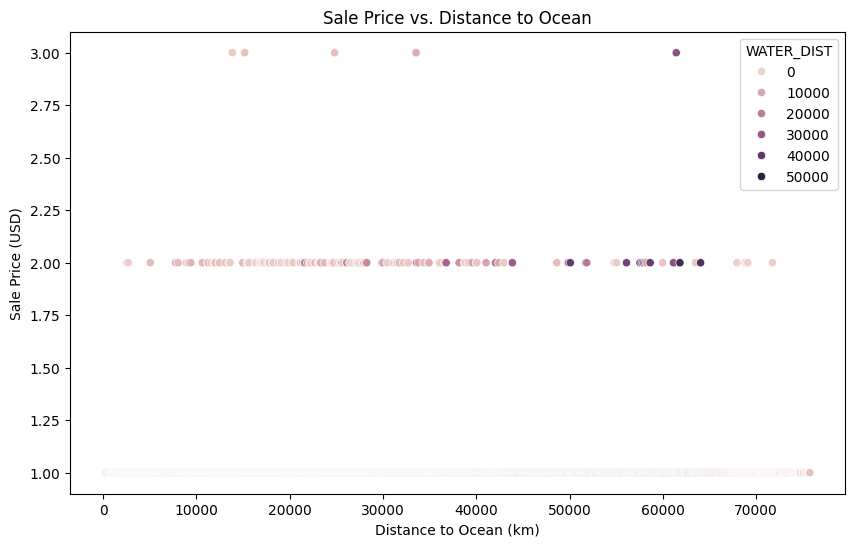

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='OCEAN_DIST', y='SALE_PRC', hue='WATER_DIST', data=df_h1)
plt.xlabel('Distance to Ocean (km)')
plt.ylabel('Sale Price (USD)')
plt.title('Sale Price vs. Distance to Ocean')
plt.show()

In [99]:
df_h1.columns

Index(['OCEAN_DIST', 'WATER_DIST', 'SALE_PRC'], dtype='object')

In [100]:
#analizamos 3 variables (age, SALE_PRC, y structure_quality) y los agrupamos
df_n=df[['age',"SALE_PRC",'structure_quality']].groupby(by=['age','structure_quality']).count().reset_index()
df_n

,age,structure_quality,SALE_PRC
0,0,2,387
1,0,3,2
2,0,4,445
3,0,5,169
4,1,2,50
...,...,...,...
325,92,4,1
326,93,2,2
327,93,4,1
328,94,1,1


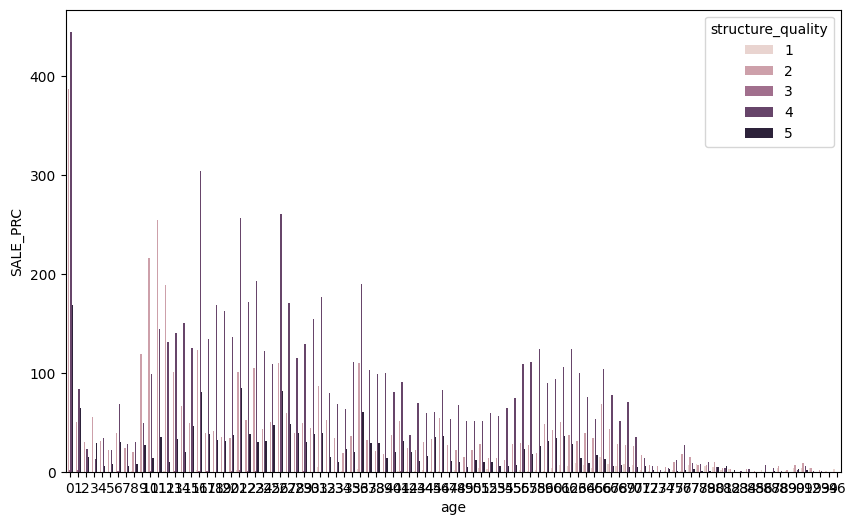

In [101]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='SALE_PRC', hue='structure_quality', data=df_n);

In [102]:
#pantallazo - muestra las primeras 5 filas
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [103]:
#pantallazo - muestra los ultimos 5 (por default)
df.tail()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4
13931,25.784387,-80.258901,131320040700,250000.0,8833,1867,266,3793.9,20859.6,3421.0,21928.6,12599.0,474.7,62,0,11,4


In [104]:
#Submuestra simple (aleatorio)
sub_muestra = df.sample(n=10)
sub_muestra

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
1854,25.872851,-80.176382,1122320280850,532500.0,9750,1957,1526,697.9,18466.1,448.7,35319.9,33432.1,10496.1,19,0,11,4
8555,25.543327,-80.372889,3060190150430,323000.0,5000,3339,701,9749.8,14596.8,6301.2,103473.1,56224.1,3121.9,9,0,4,2
967,25.921312,-80.237119,3421150035860,160000.0,9000,1549,9579,4271.7,38027.2,1807.4,54515.2,54515.2,1870.8,66,0,4,4
4140,25.735148,-80.267147,341170043391,1175000.0,7875,3299,27384,3269.6,9338.8,1838.4,28725.8,5874.6,16846.6,32,0,9,5
707,25.874232,-80.217524,3021350330460,170000.0,7791,1478,0,10785.3,31952.3,5548.8,36334.0,36334.0,2853.5,38,0,5,4
11251,25.924317,-80.346101,3220160010240,390000.0,7842,2029,51944,16421.6,73884.9,2094.2,73602.9,69668.4,1183.8,15,0,9,4
544,25.898678,-80.188410,622300020060,340000.0,10275,1522,6927,6434.5,21800.8,2033.5,44298.3,43581.2,6927.2,29,0,11,4
9992,25.463595,-80.422780,1079150080330,321000.0,5000,2649,550,18484.5,27227.1,15733.4,136700.7,89275.3,7193.5,0,0,9,2
2526,25.891779,-80.135832,1322270014890,1575000.0,10625,4490,27367,8984.7,4714.2,370.6,45752.9,36742.9,24084.7,45,0,7,5
961,25.919394,-80.231334,3421150014300,160000.0,7800,1107,6343,2598.3,36109.8,1041.8,53364.4,53364.4,2637.3,33,0,8,4


In [105]:
#mostrar columnas
df.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [106]:
#forma del dataframe (filas, columnas)
df.shape

(13932, 17)

#Análisis Inicial del Conjunto de Datos

En una primera inspección del conjunto de datos, se observa que la información recopilada sobre las 13,932 propiedades en Miami presenta una alta integridad, dado que no se registran valores faltantes en ninguna de las variables.

Al analizar la distribución de las variables numéricas, como el precio de venta y las distintas dimensiones de las propiedades, se aprecian rangos amplios que reflejan la diversidad del mercado inmobiliario de Miami. Por ejemplo, el precio de venta varía significativamente, con un mínimo de 72,000 USD y un máximo de 2,650,000 USD, lo que sugiere una amplia gama de propiedades, desde viviendas más económicas hasta mansiones de lujo.

La distribución de las propiedades en función de su antigüedad muestra una tendencia interesante: la mediana de la edad de las construcciones es de 26 años. Esto indica que una parte considerable del parque inmobiliario de Miami está compuesto por propiedades relativamente nuevas. Sin embargo, también se encuentran propiedades con una antigüedad considerable, lo que sugiere una mezcla de construcciones de diferentes épocas.

#**Hipotesis**
Estas hipótesis buscan establecer una relación entre ciertas variables (distancia al agua, edad, características especiales) y el precio de venta de las propiedades. Al analizar los datos, se podrá determinar si estas relaciones son estadísticamente significativas y si las hipótesis propuestas son correctas.



**Hipotesis 1**: La proximidad a cuerpos de agua impacta el valor de la propiedad.

Hipótesis Nula (H₀): No existe una relación significativa entre la distancia a cuerpos de agua (océano, lagos, ríos) y el precio de venta de las propiedades. En otras palabras, estar cerca del agua no hace que una propiedad sea más o menos valiosa.

Hipótesis Alternativa (H₁): Las propiedades ubicadas más cerca de cuerpos de agua tienden a tener precios de venta más altos. Esto sugiere que la cercanía al agua es un factor que incrementa el valor de una propiedad.

Si al analizar los datos se encuentra que las propiedades ubicadas a menos de 500 metros de la playa tienen un precio promedio 20% más alto que las propiedades ubicadas a más de 2 km, se podría rechazar la hipótesis nula y aceptar la hipótesis alternativa, concluyendo que la proximidad al mar influye positivamente en el precio de las propiedades.

**Hipótesis 2**: La edad de una propiedad influye en su precio de venta.

Hipótesis Nula (H₀): No hay una relación significativa entre la edad de una propiedad y su precio de venta. Es decir, la edad no afecta el valor de una propiedad.

Hipótesis Alternativa (H₁): Las propiedades más antiguas tienden a tener precios de venta más bajos. Esto implica que a medida que una propiedad envejece, su valor disminuye.

Si se observa que las propiedades construidas hace más de 50 años tienen un precio promedio 15% más bajo que las propiedades construidas en los últimos 10 años, se podría rechazar la hipótesis nula y aceptar la hipótesis alternativa, sugiriendo que la edad es un factor que disminuye el valor de las propiedades.

**Hipótesis 3**: Características específicas impactan el valor de la propiedad.

Hipótesis Nula (H₀): La presencia de características específicas (como piscinas, garajes amplios, vistas panorámicas) no tiene un impacto significativo en el precio de venta de las propiedades.

Hipótesis Alternativa (H₁): Las propiedades con características específicas (mayor valor en la variable SPEC_FEAT_VAL) tienden a tener precios de venta más altos. Esto indica que estas características añaden valor a una propiedad.

Esta hipótesis sugiere que ciertas características adicionales o especiales de una propiedad, que no están directamente relacionadas con su tamaño o ubicación, pueden influir significativamente en su precio de venta. Por ejemplo, una pileta, un garaje extra grande, una vista panorámica o acabados de lujo podrían hacer que una propiedad sea más atractiva para los compradores y, por lo tanto, aumentar su valor. Si al analizar los datos se encuentra que las propiedades con presencia de caracteristicas especiales tienen un precio de venta promedio 10% más alto que las propiedades que no las tienen, se podría rechazar la hipótesis nula y aceptar la hipótesis alternativa, concluyendo que la presencia de características especiales incrementa significativamente el valor de una propiedad.



Consideraciones:

Hipótesis 1: Proximidad a cuerpos de agua

Al analizar las variables "OCEAN_DIST", "WATER_DIST" y "SALE_PRC", podemos obtener indicios iniciales sobre la relación entre la cercanía a cuerpos de agua y el precio de venta. La distribución de la distancia al océano (OCEAN_DIST) sugiere una concentración de propiedades relativamente cercanas a la costa. Sin embargo, para corroborar si esta proximidad se traduce en un precio más elevado, será necesario realizar un análisis de correlación más profundo y posiblemente un modelo de regresión.

Hipótesis 2: Edad de la propiedad

La variable "age" proporciona información valiosa para evaluar la relación entre la antigüedad de una propiedad y su precio. La mediana de edad de 26 años indica que el mercado inmobiliario de Miami tiene un mix de propiedades de diferentes épocas. Sin embargo, para determinar si la edad es un factor determinante en el precio, se requiere un análisis más detallado, considerando otras variables como la ubicación y las características específicas de cada propiedad.

Hipótesis 3: Características especiales

La variable "SPEC_FEAT_VAL" es un indicador de las características adicionales de una propiedad. El amplio rango de valores en esta variable sugiere una gran diversidad en términos de amenities y acabados. Para evaluar el impacto de estas características en el precio, será necesario analizar su relación con el precio de venta y controlar por otras variables que puedan influir, como el tamaño de la propiedad o la ubicación.

# Exploracion del dataset

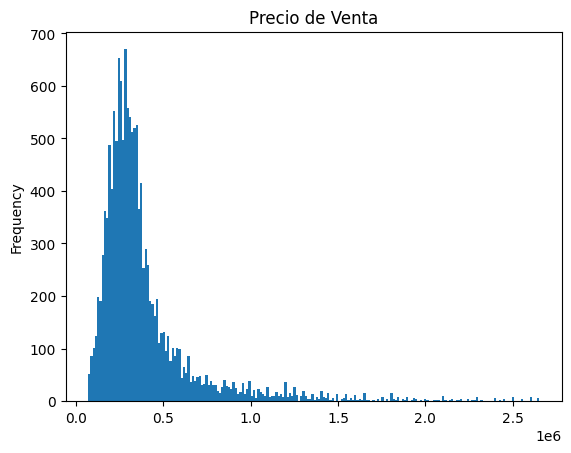

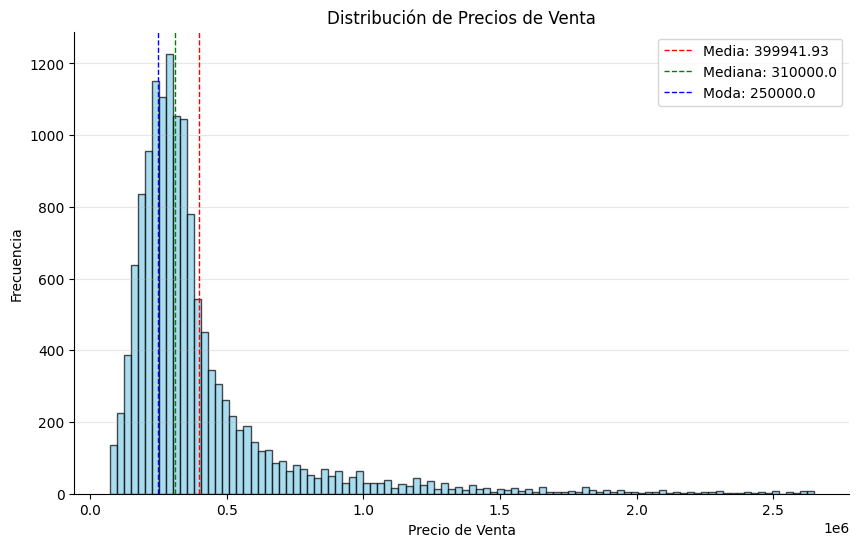

In [113]:
# @title SALE_PRC

from matplotlib import pyplot as plt
df['SALE_PRC'].plot(kind='hist', bins=200, title='Precio de Venta')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['SALE_PRC'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_SALE_PRC = df['SALE_PRC'].mean()
median_SALE_PRC = df['SALE_PRC'].median()
mode_SALE_PRC = df['SALE_PRC'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_SALE_PRC, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_SALE_PRC:.2f}')
plt.axvline(median_SALE_PRC, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_SALE_PRC}')
plt.axvline(mode_SALE_PRC, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_SALE_PRC}')

plt.legend()
plt.show()


plt.show()

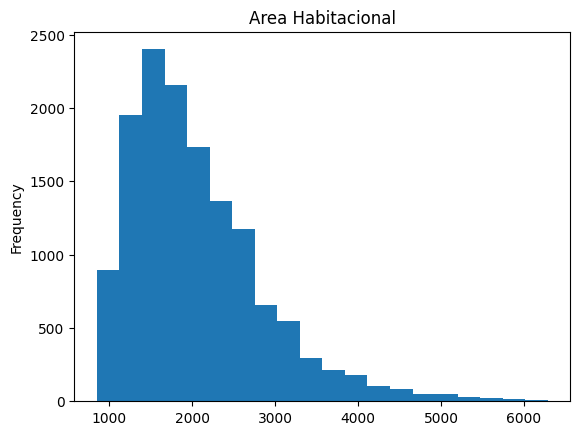

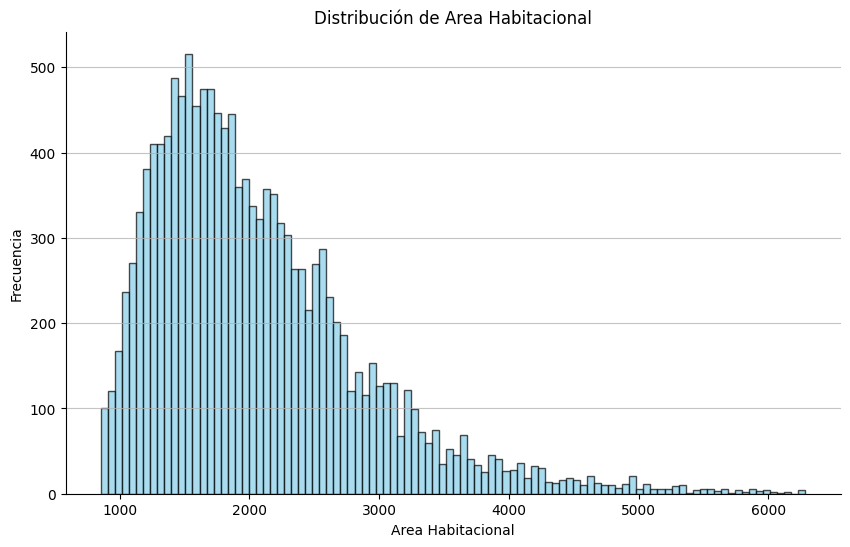

In [108]:
# @title TOT_LVG_AREA

from matplotlib import pyplot as plt
df['TOT_LVG_AREA'].plot(kind='hist', bins=20, title='Area Habitacional')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['TOT_LVG_AREA'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Area Habitacional')
plt.ylabel('Frecuencia')
plt.title('Distribución de Area Habitacional')
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

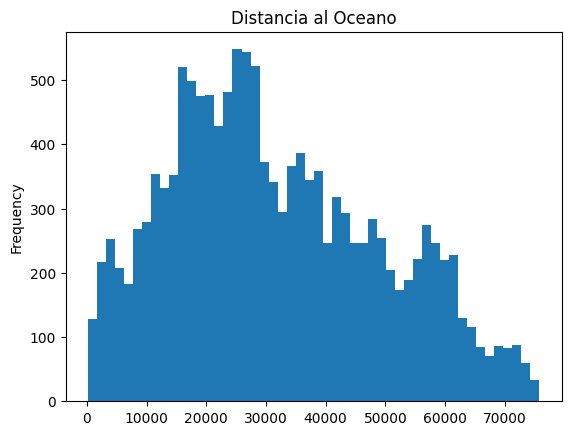

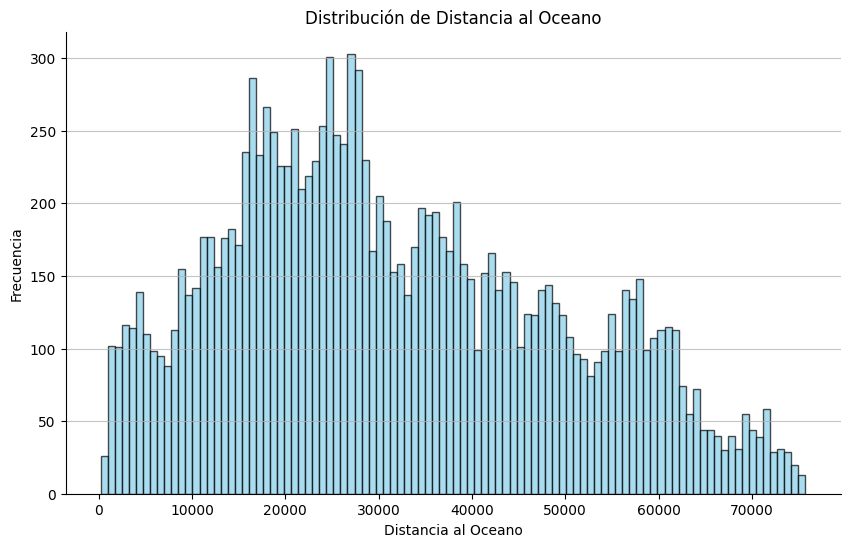

In [109]:
# @title OCEAN_DIST

from matplotlib import pyplot as plt
df['OCEAN_DIST'].plot(kind='hist', bins=50, title='Distancia al Oceano')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['OCEAN_DIST'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distancia al Oceano')
plt.ylabel('Frecuencia')
plt.title('Distribución de Distancia al Oceano')
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

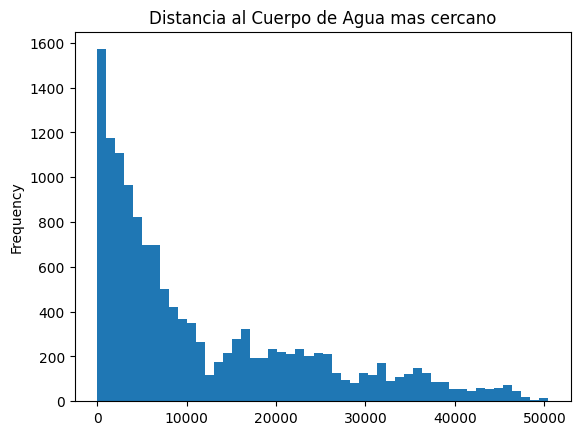

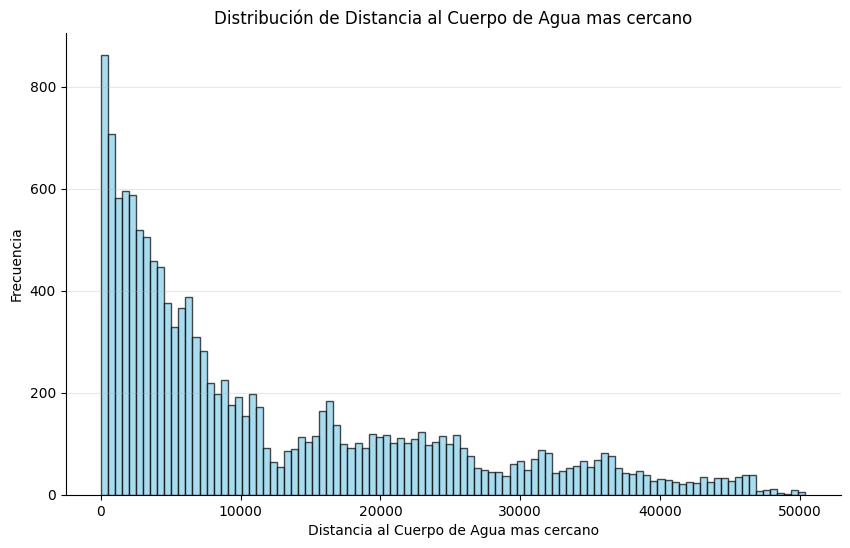

In [110]:
# @title WATER_DIST

from matplotlib import pyplot as plt
df['WATER_DIST'].plot(kind='hist', bins=50, title='Distancia al Cuerpo de Agua mas cercano')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['WATER_DIST'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distancia al Cuerpo de Agua mas cercano')
plt.ylabel('Frecuencia')
plt.title('Distribución de Distancia al Cuerpo de Agua mas cercano')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

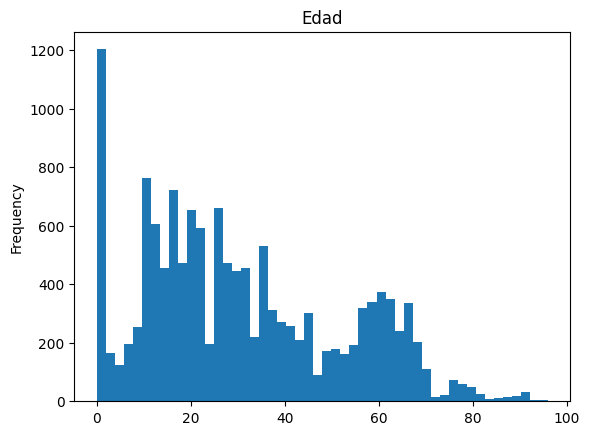

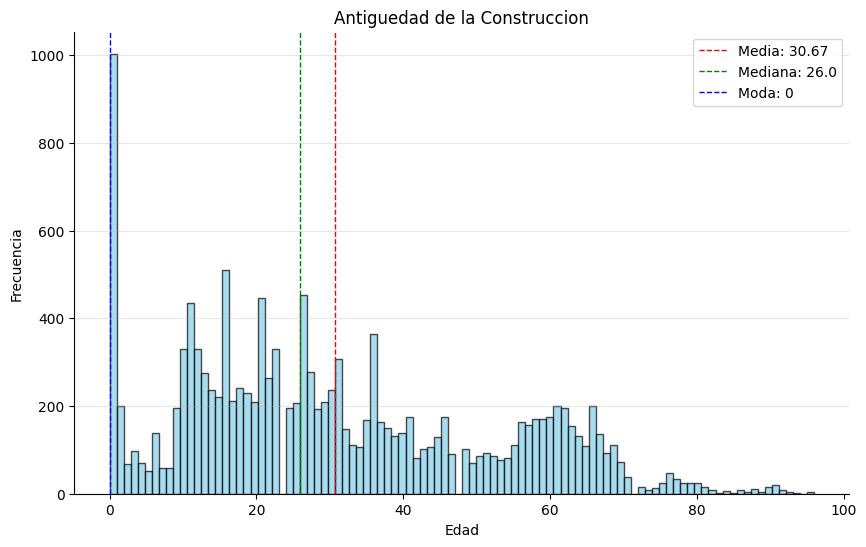

In [112]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=50, title='Edad')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Antiguedad de la Construccion')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_age}')
plt.axvline(mode_age, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_age}')

plt.legend()
plt.show()

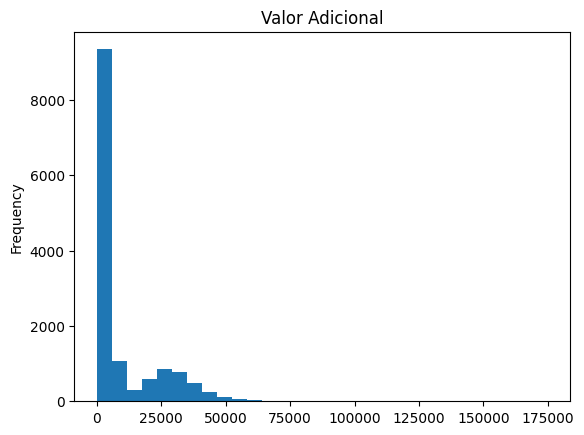

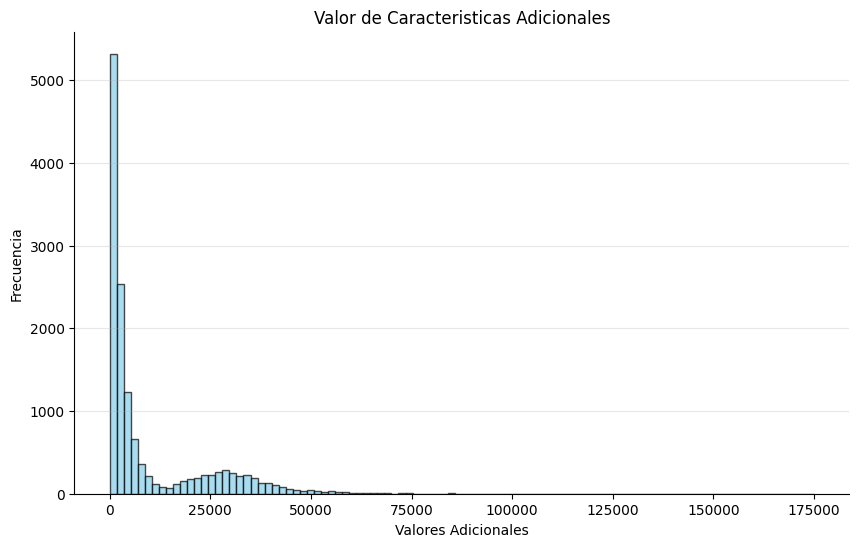

In [76]:
# @title SPEC_FEAT_VAL

from matplotlib import pyplot as plt
df['SPEC_FEAT_VAL'].plot(kind='hist', bins=30, title='Valor Adicional')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['SPEC_FEAT_VAL'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Valores Adicionales')
plt.ylabel('Frecuencia')
plt.title('Valor de Caracteristicas Adicionales')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# Informacion del Dataset

##Descripcion de Variables y Dominio

1. PARCELNO: identificador único de cada propiedad.
2. SALE_PRC: precio de venta
3. LND_SQFOOT: area del terreno (pies cuadrados)
4. TOT_LVG_AREA: área del piso (pies cuadrados)
5. SPEC_FEAT_VAL: valor de las características especiales (por ejemplo, piscinas)
6. RAIL_DIST: distancia a la línea ferroviaria más cercana (un indicador de ruido) (pies)
7. OCEAN_DIST: distancia al océano (pies)
8. WATER_DIST: distancia al cuerpo de agua más cercano (pies)
9. CNTR_DIST: distancia al distrito comercial central de Miami (pies)
10. SUBCNTR_DI: distancia al subcentro más cercano (pies)
11. HWY_DIST: distancia a la autopista más cercana (un indicador de ruido) (pies)
12. edad: edad de la estructura
13. avno60plus: variable ficticia para el ruido de los aviones que excede un nivel aceptable
14. structure_quality: calidad de la estructura
15. month_sold: mes de venta en 2016
16. LATITUD
17. LONGITUD

##Identificacion de Outliers

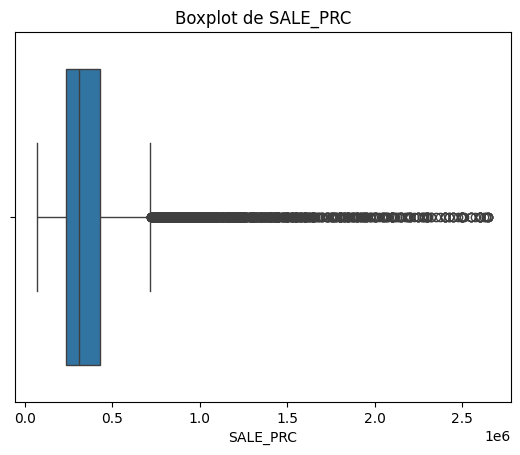

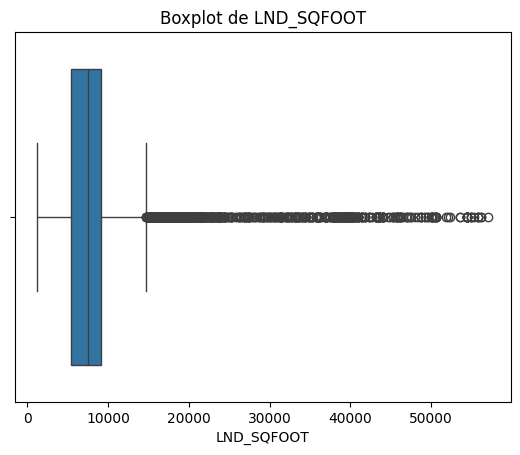

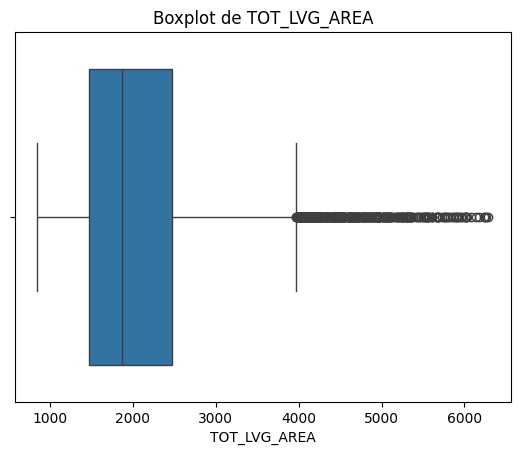

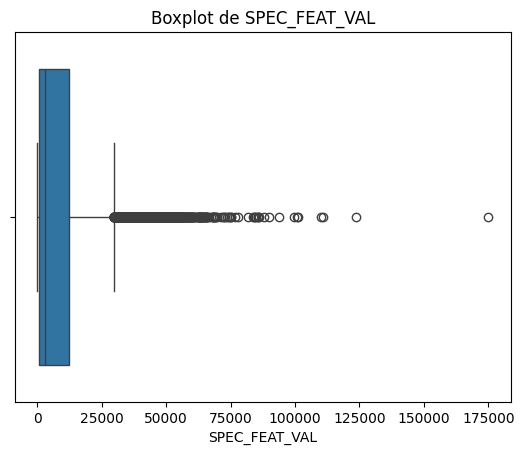

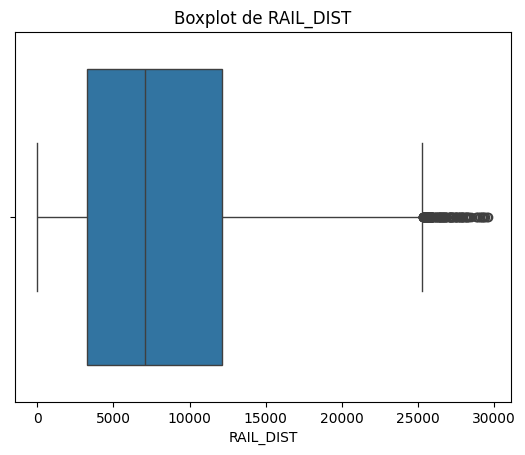

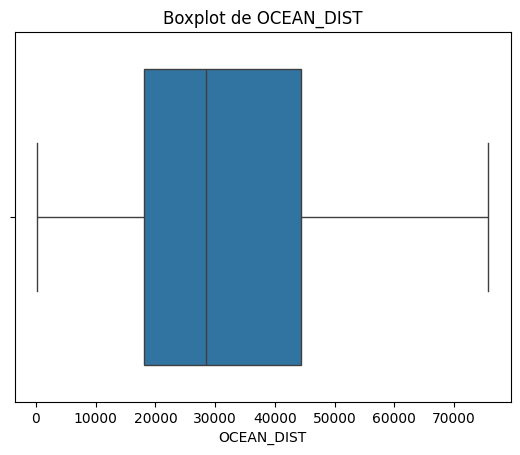

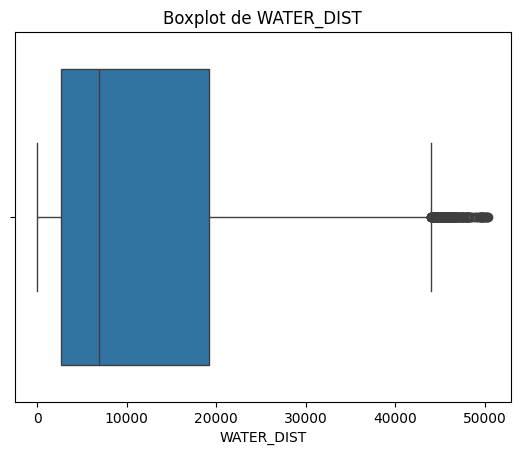

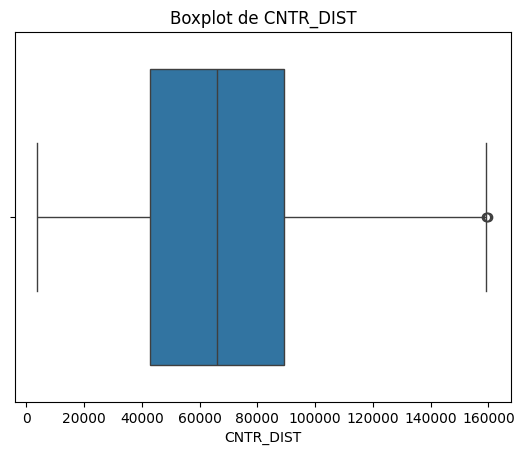

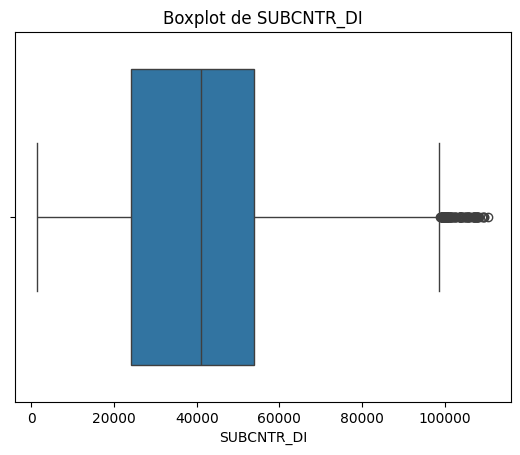

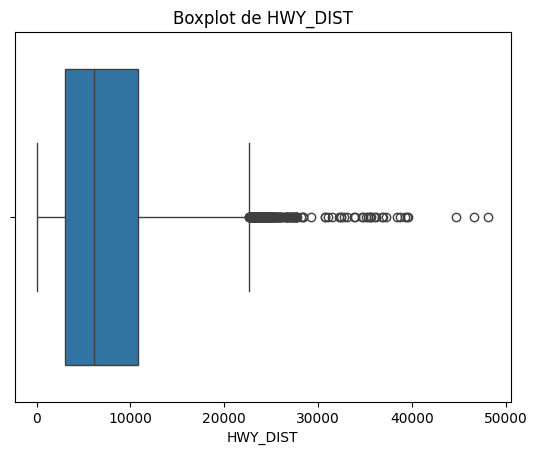

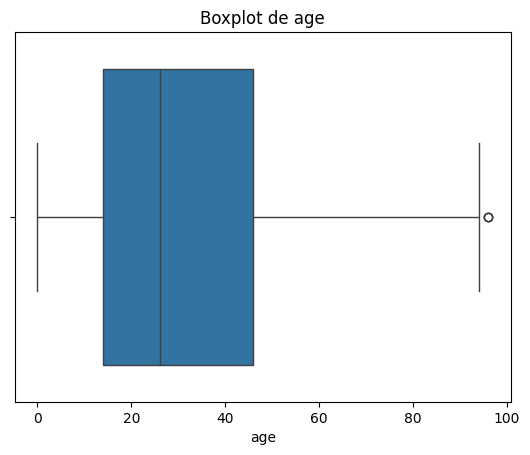

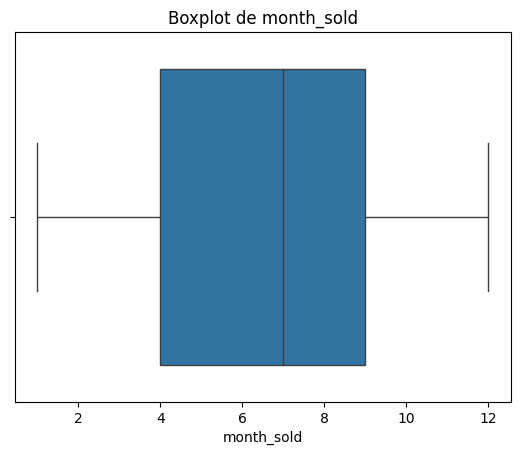

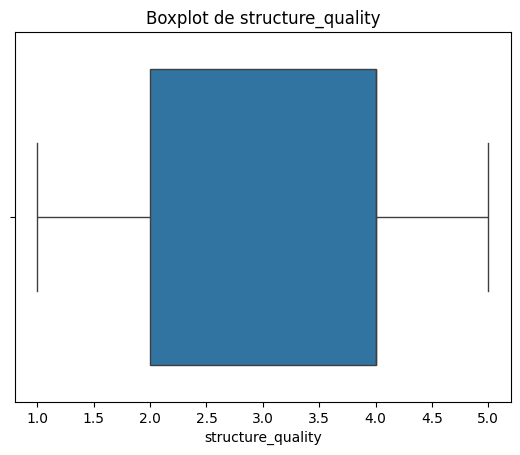

Registros con outliers:
        LATITUDE  LONGITUDE       PARCELNO   SALE_PRC  LND_SQFOOT  \
2      25.891334 -80.153740   622280100470   800000.0        9375   
3      25.891765 -80.152657   622280100530   988000.0       12450   
4      25.891825 -80.154639   622280100200   755000.0       12800   
6      25.892473 -80.157217   622280080100  1020000.0       10387   
7      25.893019 -80.157426   622280080400   850000.0       10272   
...          ...        ...            ...        ...         ...   
13809  25.622745 -80.430275  3059270130030   340000.0       13989   
13811  25.624716 -80.428378  3059270131580   350000.0        8559   
13835  25.621488 -80.420679  3059270060310   310000.0        7502   
13857  25.624401 -80.420218  3059270301630   345000.0        5000   
13918  25.609801 -80.381249  3050310210910   255000.0       15000   

       TOT_LVG_AREA  SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  \
2              2276          49206     4412.9     10574.1       297.1   
3

In [78]:
numericas = ['SALE_PRC','LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL','RAIL_DIST','OCEAN_DIST','WATER_DIST','CNTR_DIST','SUBCNTR_DI','HWY_DIST','age','month_sold','structure_quality']

# la variable structure_quality se consideraria una variable numerica o categorica?

for column in numericas:
    sns.boxplot(x=df[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = df[outliers]
print("Registros con outliers:")
print(outlier_rows)